# BIG DATA ANALYTICS: Final Project
## Improving Employee Retention at YATS Corp.

André Faddoul, Dora Linda Kocsis, Noémie Quéré, Kilian Tep


# --0. Packages

In [521]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import *
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time
from time import time

from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split #for splitting data into train and test
from sklearn import metrics # for finding the accuracy of model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold,cross_val_score


%matplotlib inline
warnings.filterwarnings("ignore")


# --1. Loading the Data

In [522]:
df = pd.read_csv(r'/Users/dorak/Google Drive/Big Data Analytics/Dev/HR_comma_sep.csv', delimiter = ',', header = 0)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# --2. Preliminary Data Analysis

In [523]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [524]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [525]:
def num_missing(x):
  return sum(x.isnull())

print ("Missing values per column:")
df.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column


Missing values per column:


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

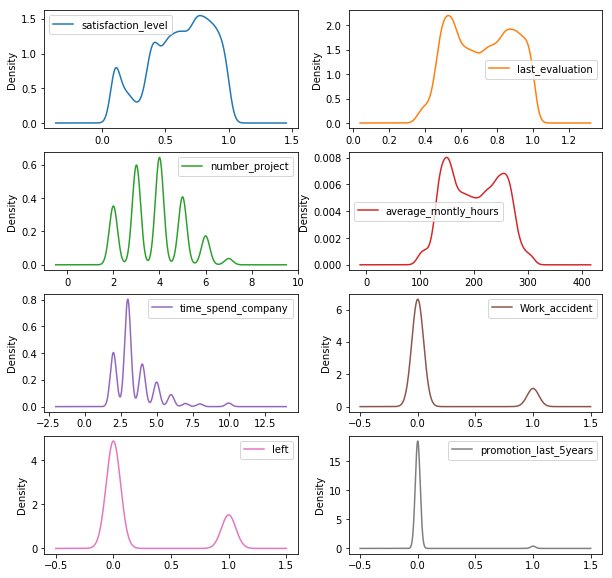

In [526]:
df.plot(kind='density', subplots=True, layout=(4,2),figsize=(10,10), sharex=False)
plt.show()

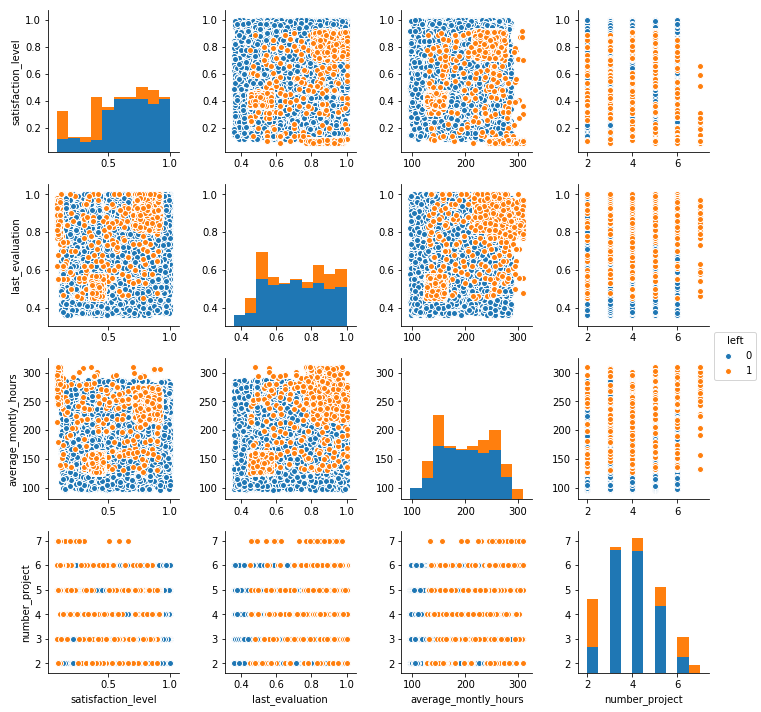

In [527]:
sns.pairplot(df, hue="left", vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours','number_project'])
plt.show()

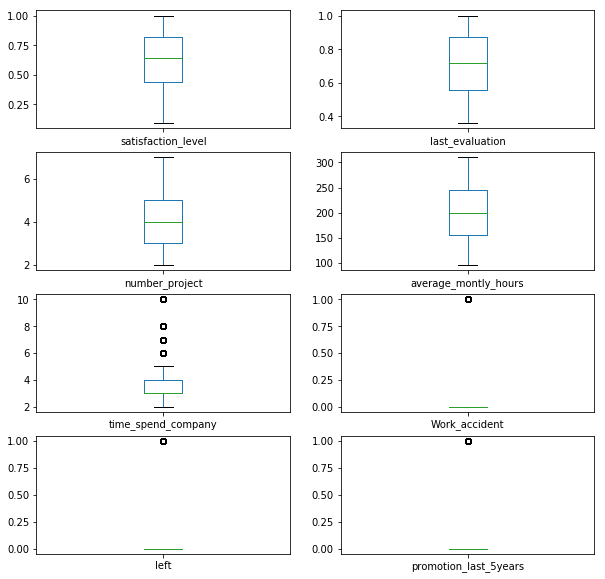

In [528]:
df.plot(kind='box', subplots=True, layout=(4,2), figsize=(10,10),sharex=False, sharey=False)
plt.show()

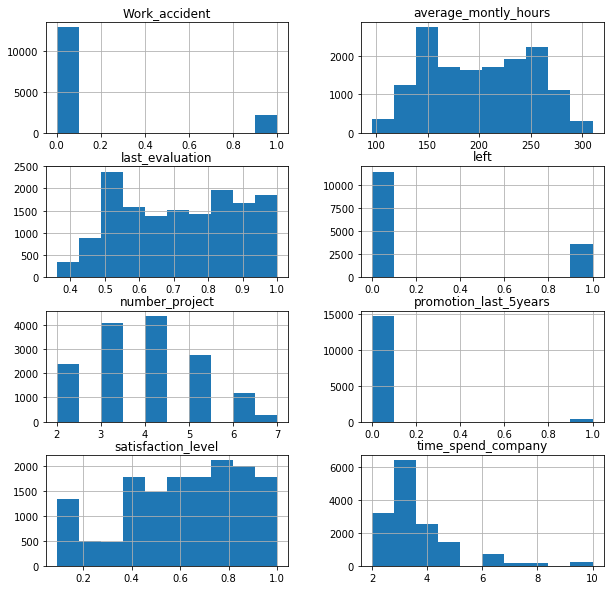

In [529]:
df.hist(figsize=(10,10), layout=(4,2))
plt.show()

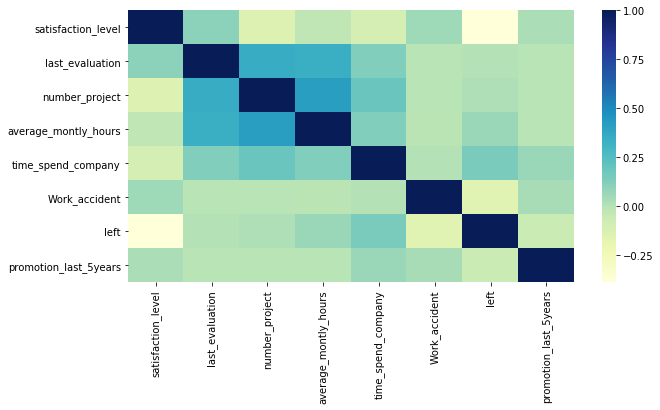

In [530]:
corr = df.corr()
plt.figure(figsize= (10,5))
corr_heatmap = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap="YlGnBu")
plt.show()

In [531]:
sbs = df.groupby(['sales','salary']).size()
sbs = sbs.unstack()

cm = sns.light_palette("red", as_cmap=True)
s = sbs.style.background_gradient(cmap=cm)
s

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [532]:
sbs = df.groupby(['sales','promotion_last_5years']).size()
sbs = sbs.unstack()

cm = sns.light_palette("red", as_cmap=True)
s = sbs.style.background_gradient(cmap=cm)
s

promotion_last_5years,0,1
sales,,
IT,1224,3
RandD,760,27
accounting,753,14
hr,724,15
management,561,69
marketing,815,43
product_mng,902,nan
sales,4040,100
support,2209,20


In [533]:
sbs = df.groupby(['sales','left']).size()
sbs = sbs.unstack()

cm = sns.light_palette("red", as_cmap=True)
s = sbs.style.background_gradient(cmap=cm)
s

left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


# --3. Data Preprocessing

## 3.1/ Categorical Variables

### Salary

In [534]:
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

### Sales

In [535]:
df1 = pd.get_dummies(df[['sales']])
df.drop('sales', axis=1)

# Quantitative Variables
df2=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'left', 'promotion_last_5years','salary']]

# Concatenate the 2 dataframes
df_data=pd.concat([df2,df1],axis=1)

# Verification
df_data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## 3.2/ Analysis

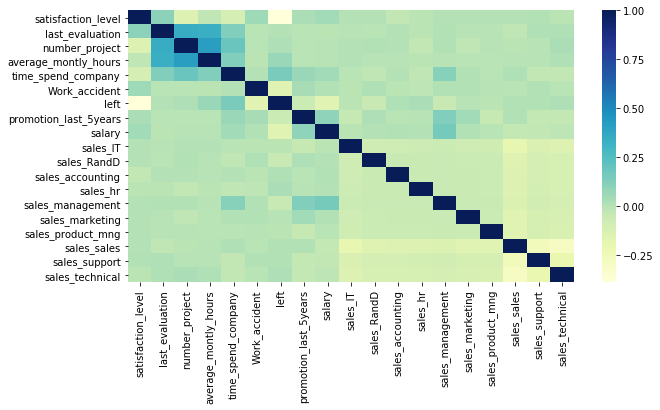

In [536]:
corr = df_data.corr()
plt.figure(figsize= (10,5))
corr_heatmap = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap="YlGnBu")
plt.show()

### Employee Satisfaction per Department

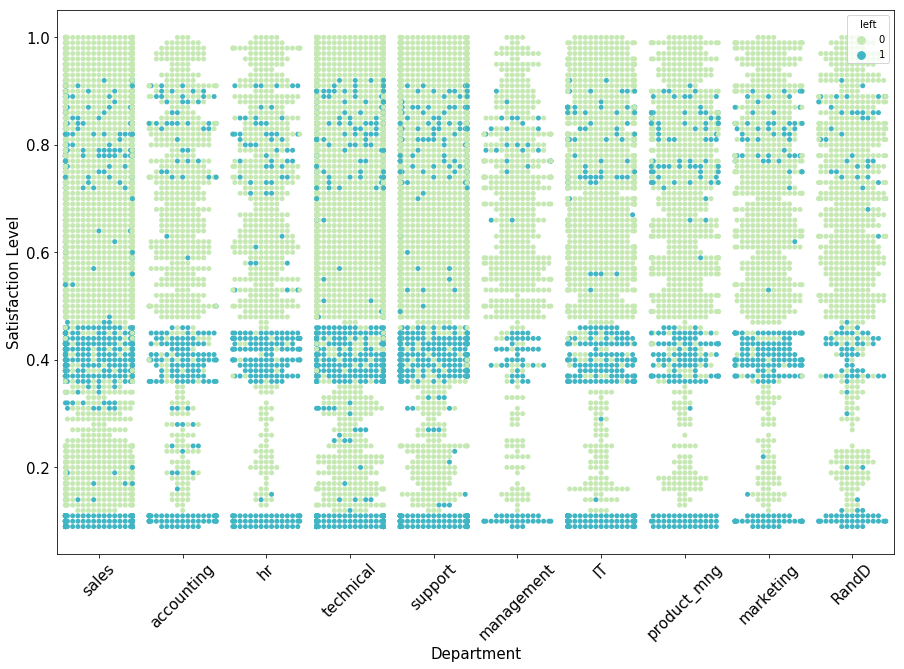

In [537]:
plt.figure(figsize= (15,10))
sns.swarmplot(x='sales', y='satisfaction_level', hue='left', data=df, palette=sns.color_palette("YlGnBu", 3))
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.ylabel('Satisfaction Level', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.show()

### Time Spent at the Company as a Function of Employees

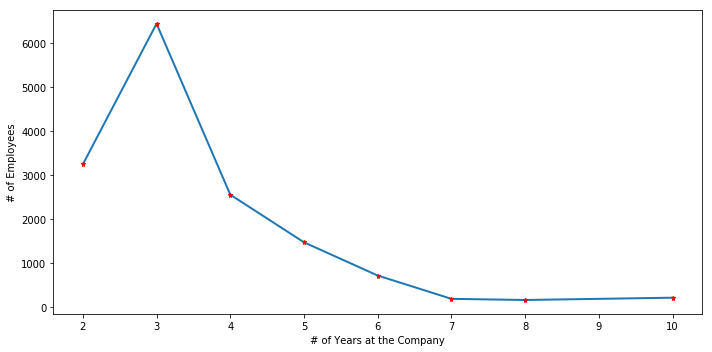

In [538]:
counts = df_data['time_spend_company'].value_counts().to_dict()

time_spent = pd.DataFrame(list(counts.items()), columns=['year', 'count'])
time_spent = time_spent.sort_values(by='year')

plt.figure(figsize=(10,5))
plt.plot(time_spent['year'], time_spent['count'], linewidth=2)
plt.plot(time_spent['year'], time_spent['count'], '*', markersize=5, color='red')
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10)
plt.xlabel('# of Years at the Company',fontsize=10)
plt.ylabel('# of Employees',fontsize=10)
plt.tight_layout()

plt.show()

### Distribution per Employee Evaluation

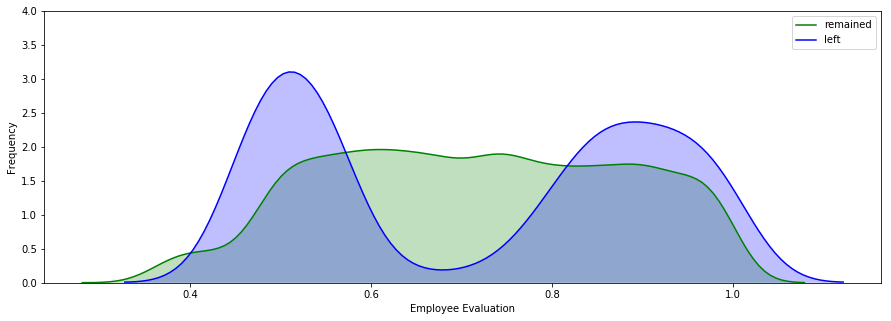

In [539]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='g',shade=True,label='remained')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='b',shade=True, label='left')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.ylim((0,4))
plt.show()

### Distribution per Average Monthly Hours

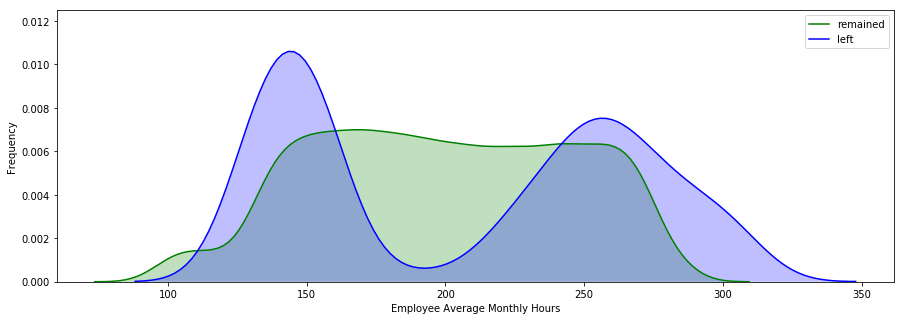

In [540]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='g',shade=True, label='remained')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='b',shade=True, label='left')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.ylim((0,0.0125))
plt.show()

### Average Monthly Hours vs # of Projects

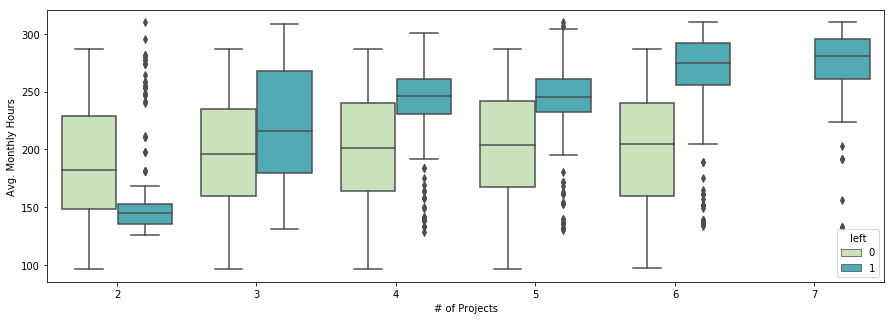

In [541]:
plt.figure(figsize= (15,5))
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df, palette=sns.color_palette("YlGnBu", 3))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Avg. Monthly Hours', fontsize=10)
plt.xlabel('# of Projects', fontsize=10)
plt.show()

### Evaluation & Satisfaction Level vs # of Projects

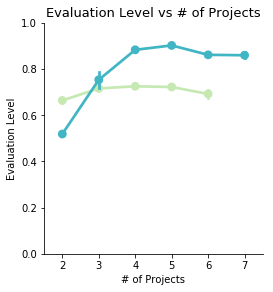

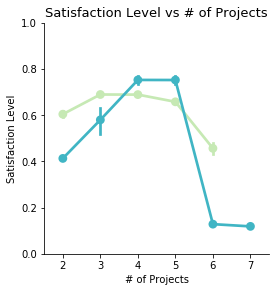

In [542]:
plt.figure(figsize= (10,5))
sns.factorplot(x="number_project", y="last_evaluation", hue="left", data=df, legend = False, palette=sns.color_palette("YlGnBu", 3))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Evaluation Level', fontsize=10)
plt.xlabel('# of Projects', fontsize=10)
plt.ylim([0.0,1.0])
plt.title('Evaluation Level vs # of Projects',fontsize=13)
plt.show()

plt.figure(figsize= (15,10))
sns.factorplot(x="number_project", y="satisfaction_level", hue="left", data=df, legend = False, palette=sns.color_palette("YlGnBu", 3))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Satisfaction Level', fontsize=10)
plt.xlabel('# of Projects', fontsize=10)
plt.ylim([0.0,1.0])
plt.title('Satisfaction Level vs # of Projects',fontsize=13)
plt.show()


### Evaluation & Satisfaction Level vs Time Spent at Company

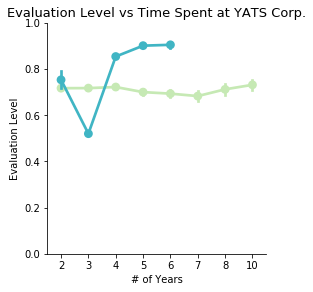

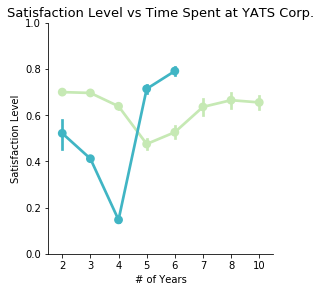

In [543]:
plt.figure(figsize= (10,5))
sns.factorplot(x="time_spend_company", y="last_evaluation", hue="left", data=df, legend = False, palette=sns.color_palette("YlGnBu", 3))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Evaluation Level', fontsize=10)
plt.xlabel('# of Years', fontsize=10)
plt.ylim([0.0,1.0])
plt.title('Evaluation Level vs Time Spent at YATS Corp.',fontsize=13)
plt.show()

plt.figure(figsize= (10,5))
sns.factorplot(x="time_spend_company", y="satisfaction_level", hue="left", data=df, legend = False, palette=sns.color_palette("YlGnBu", 3))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Satisfaction Level', fontsize=10)
plt.xlabel('# of Years', fontsize=10)
plt.ylim([0.0,1.0])
plt.title('Satisfaction Level vs Time Spent at YATS Corp.',fontsize=13)
plt.show()

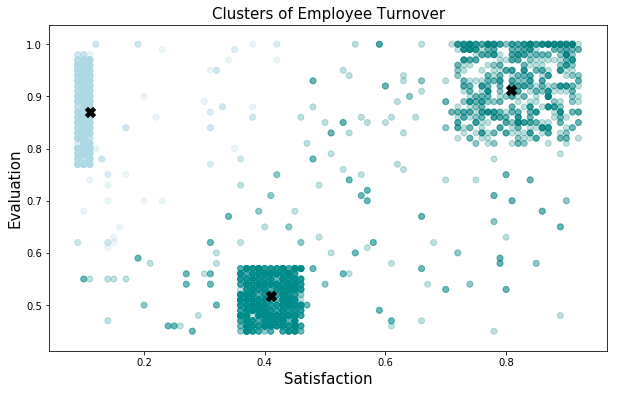

In [544]:
# Import KMeans Model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.left==1][["satisfaction_level","last_evaluation"]])

kmeans_colors = ['teal' if c == 0 else 'lightblue' if c == 2 else 'darkcyan' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction", fontsize = 15)
plt.ylabel("Evaluation", fontsize = 15)
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover", fontsize = 15)
plt.show()

# --4. Modelling 

## 4.1/ Using the Entire Dataset

### Train / Test Split

In [545]:
#Spilting data into test and train split:
data=df_data.drop(['left'],axis=1)
target=df_data['left']

In [546]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

### Feature Importance using RandomForestClassifier

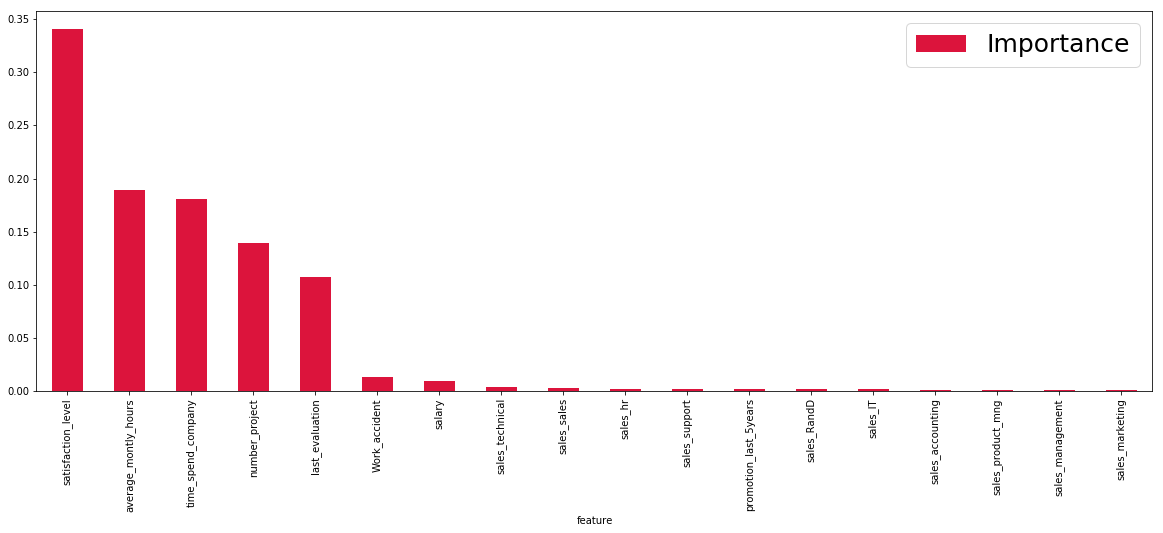

In [547]:
clf = RandomForestClassifier()
rf = clf.fit(X_train, y_train)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['Importance'] = rf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

tmp= features.iloc[:40,:]
tmp.plot(kind='bar', figsize=(20, 7), color='crimson')
plt.legend(['Importance'],prop=({'size':25}))
plt.show()

### Modelling

In [548]:
tree=DecisionTreeClassifier()
rf=RandomForestClassifier()
sv=SVC()
gbm=GradientBoostingClassifier(random_state=10)
logit=LogisticRegression()

n_neighbors = 5
knn_unif = KNeighborsClassifier(n_neighbors, weights='uniform')
knn_dist = KNeighborsClassifier(n_neighbors, weights='distance')

In [549]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    print("")
    print("==================================================================================")
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    print("Learning time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    print("Predicting time {0}s".format(time() - now))

    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print("=================================== Results ======================================")
    print("         Employees Left")
    print("F1       " + str(f1))
    print("Precision" + str(precision))
    print("Recall   " + str(recall))
    print("Accuracy " + str(accuracy))
    print("===================================================================================")

    return model

In [550]:
test_classifier(X_train,y_train,X_test,y_test,tree)


Testing DecisionTreeClassifier
Learning time 0.05267524719238281s
Predicting time 0.001001596450805664s
=================================== Results ======================================
         Employees Left
F1       0.942654287275
Precision0.923982869379
Recall   0.962095875139
Accuracy 0.972


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [551]:
test_classifier(X_train,y_train,X_test,y_test,rf)


Testing RandomForestClassifier
Learning time 0.10379266738891602s
Predicting time 0.00902414321899414s
=================================== Results ======================================
         Employees Left
F1       0.972789115646
Precision0.989619377163
Recall   0.95652173913
Accuracy 0.9872


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [552]:
test_classifier(X_train,y_train,X_test,y_test,sv)


Testing SVC
Learning time 2.5567543506622314s
Predicting time 0.489931583404541s
=================================== Results ======================================
         Employees Left
F1       0.894014277869
Precision0.880952380952
Recall   0.907469342252
Accuracy 0.948533333333


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [553]:
test_classifier(X_train,y_train,X_test,y_test,gbm)


Testing GradientBoostingClassifier
Learning time 0.8365879058837891s
Predicting time 0.009531021118164062s
=================================== Results ======================================
         Employees Left
F1       0.943310657596
Precision0.959630911188
Recall   0.927536231884
Accuracy 0.973333333333


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [554]:
test_classifier(X_train,y_train,X_test,y_test,logit)


Testing LogisticRegression
Learning time 0.05013227462768555s
Predicting time 0.0s
=================================== Results ======================================
         Employees Left
F1       0.458100558659
Precision0.61308411215
Recall   0.365663322185
Accuracy 0.793066666667


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [555]:
test_classifier(X_train,y_train,X_test,y_test,knn_unif)


Testing KNeighborsClassifier
Learning time 0.027075529098510742s
Predicting time 0.1092984676361084s
=================================== Results ======================================
         Employees Left
F1       0.863324538259
Precision0.819639278557
Recall   0.911928651059
Accuracy 0.930933333333


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [556]:
test_classifier(X_train,y_train,X_test,y_test,knn_dist)


Testing KNeighborsClassifier
Learning time 0.03007793426513672s
Predicting time 0.13337087631225586s
=================================== Results ======================================
         Employees Left
F1       0.898899947617
Precision0.847826086957
Recall   0.95652173913
Accuracy 0.948533333333


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

### Model Comparison

In [557]:
import time

check_random_state(42)
tps0=time.clock()
K=9

# Classifiers

tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_decrease=0,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best')

rf   = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                              max_depth=None, max_features='auto', max_leaf_nodes=None,
                              min_impurity_decrease=0,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                              oob_score=False, random_state=None, verbose=0,
                              warm_start=False)

gbm = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                 learning_rate=0.1, loss='deviance', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=10, subsample=1.0, verbose=0,
                                 warm_start=False)

svm_  = SVC(kernel='rbf',gamma='auto',C=1.0)

logi = LogisticRegression(C=1.0)

knn_unif = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                                weights='uniform')

knn_dist = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                                weights='distance')



# Number of iterations
B=50 # to test the loop : use B=3 instead

# Parameters grids
listMethGrid=[tree,rf,gbm,svm_,logi,knn_unif, knn_dist]

arrayError=np.empty((B,8))

for i in range(B):
    X_train2,X_test2,Y_train2,Y_test2=train_test_split(X_train, y_train,test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_train2)  
    
    X_train2 = scaler.transform(X_train2)  
    X_test2 = scaler.transform(X_test2)
    
    # Computation of test error
    for j,method in enumerate(listMethGrid):
        methFit=method.fit(X_train2, Y_train2)
        arrayError[i,j]=methFit.score(X_test2,Y_test2)
        
tps1=time.clock()
print("Execution time in mn :",(tps1 - tps0)/60)

dataframeError=pd.DataFrame(arrayError,columns=["Decision Tree","RF","GBM","SVM","KNN_dist", "KNN_unif","Logit", "..."])  

Execution time in mn : 3.2703711344194137


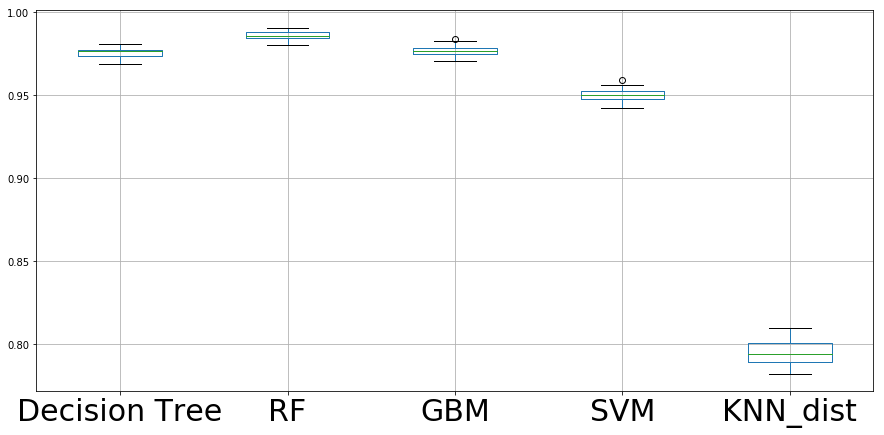

In [558]:
fig, ax = plt.subplots(figsize=(15,7))
dataframeError[["Decision Tree","RF","GBM","SVM","KNN_dist"]].boxplot(return_type='dict')
dataframeError.to_csv('dataframeError_B50.csv',index=None)
ax.set_xticklabels(["Decision Tree","RF","GBM","SVM","KNN_dist"],fontsize=30)
plt.show()

## 4.3/ Splitting Data: Good & Bad Employees

### Subsetting Data

In [559]:
df_good = df_data[(df_data['last_evaluation'] >= 0.75) & (df_data['number_project']> 5) & (df_data['time_spend_company'] >=4)]

In [560]:
df_good.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11,0.11,0.81,6,305,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
20,0.11,0.83,6,282,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
22,0.09,0.95,6,304,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [561]:
print(df_good.shape)

(1002, 19)


### Reasons of Departure - 'Good' Employees

In [562]:
df_good_select = df_good[['satisfaction_level', 'number_project', 'average_montly_hours',
                          'time_spend_company','Work_accident','left','promotion_last_5years']]

corr = pd.DataFrame(df_good_select.corr())
#cmap = corr =sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_precision(2)

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,-0.19,-0.57,0.45,0.12,-0.72,0.087
number_project,-0.19,1,0.2,-0.12,-0.12,0.23,-0.05
average_montly_hours,-0.57,0.2,1,-0.38,-0.22,0.61,-0.057
time_spend_company,0.45,-0.12,-0.38,1,0.099,-0.55,-0.035
Work_accident,0.12,-0.12,-0.22,0.099,1,-0.24,0.15
left,-0.72,0.23,0.61,-0.55,-0.24,1,-0.12
promotion_last_5years,0.087,-0.05,-0.057,-0.035,0.15,-0.12,1


### Train/Test split

In [563]:
df_good1=df_good.drop(['left'],axis=1)
target_good=df_good['left']

In [564]:
X_traing, X_testg, y_traing, y_testg = train_test_split(df_good1, target_good, test_size=0.25, random_state=42)

## Modeling on split dataset - 'Good' Employees

### Feature Importance using RandomForestClassifier

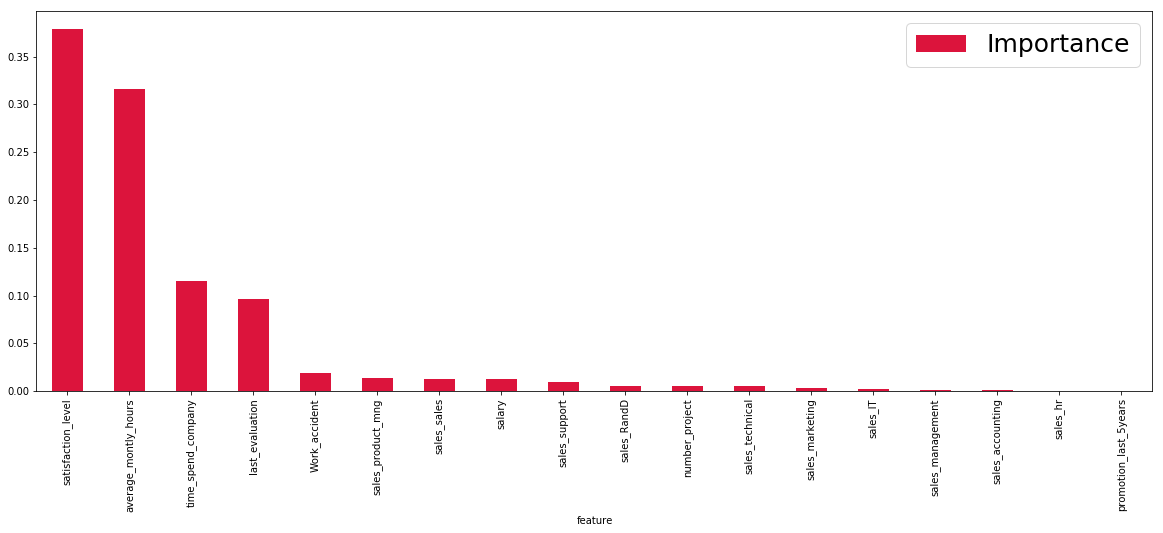

In [565]:
clfg = RandomForestClassifier()
rfg = clfg.fit(X_traing, y_traing)

features = pd.DataFrame()
features['feature'] = X_traing.columns
features['Importance'] = rfg.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

tmp= features.iloc[:40,:]
tmp.plot(kind='bar', figsize=(20, 7), color='crimson')
plt.legend(['Importance'],prop=({'size':25}))
plt.show()

### Modeling

In [566]:
from time import time

treeg=DecisionTreeClassifier()
rfg=RandomForestClassifier()
svg=SVC()
gbmg=GradientBoostingClassifier(random_state=10)
logitg=LogisticRegression()

n_neighbors = 5
knn_unifg = KNeighborsClassifier(n_neighbors, weights='uniform')
knn_distg = KNeighborsClassifier(n_neighbors, weights='distance')

In [567]:
def test_classifier(X_traing, y_traing, X_testg, y_testg, classifier):
    print("")
    print("==================================================================================")
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    now1 = time()
    list_of_labels = sorted(list(set(y_traing)))
    model = classifier.fit(X_traing, y_traing)
    print("Learing time {0}s".format(time() - now1))
    now1 = time()
    predictionsg = model.predict(X_testg)
    print("Predicting time {0}s".format(time() - now1))

    precisiong = precision_score(y_testg, predictionsg)
    recallg = recall_score(y_testg, predictionsg)
    accuracyg = accuracy_score(y_testg, predictionsg)
    f1g = f1_score(y_testg, predictionsg)
    print("=================================== Results ======================================")
    print("         Employees Left")
    print("F1       " + str(f1g))
    print("Precision" + str(precisiong))
    print("Recall   " + str(recallg))
    print("Accuracy " + str(accuracyg))
    print("===================================================================================")

    return model

In [568]:
test_classifier(X_traing,y_traing,X_testg,y_testg,treeg)


Testing DecisionTreeClassifier
Learing time 0.004009723663330078s
Predicting time 0.001003265380859375s
=================================== Results ======================================
         Employees Left
F1       0.990384615385
Precision0.980952380952
Recall   1.0
Accuracy 0.98406374502


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [569]:
test_classifier(X_traing,y_traing,X_testg,y_testg,rfg)


Testing RandomForestClassifier
Learing time 0.0240628719329834s
Predicting time 0.0020062923431396484s
=================================== Results ======================================
         Employees Left
F1       0.992771084337
Precision0.985645933014
Recall   1.0
Accuracy 0.988047808765


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [570]:
test_classifier(X_traing,y_traing,X_testg,y_testg,svg)


Testing SVC
Learing time 0.015039205551147461s
Predicting time 0.003008127212524414s
=================================== Results ======================================
         Employees Left
F1       0.962441314554
Precision0.931818181818
Recall   0.995145631068
Accuracy 0.93625498008


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [571]:
test_classifier(X_traing,y_traing,X_testg,y_testg,gbmg)


Testing GradientBoostingClassifier
Learing time 0.19904589653015137s
Predicting time 0.0010023117065429688s
=================================== Results ======================================
         Employees Left
F1       1.0
Precision1.0
Recall   1.0
Accuracy 1.0


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [572]:
test_classifier(X_traing,y_traing,X_testg,y_testg,logitg)


Testing LogisticRegression
Learing time 0.0050122737884521484s
Predicting time 0.0s
=================================== Results ======================================
         Employees Left
F1       0.959810874704
Precision0.935483870968
Recall   0.985436893204
Accuracy 0.932270916335


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [573]:
test_classifier(X_traing,y_traing,X_testg,y_testg,knn_unifg)


Testing KNeighborsClassifier
Learing time 0.0030090808868408203s
Predicting time 0.0030074119567871094s
=================================== Results ======================================
         Employees Left
F1       0.957547169811
Precision0.93119266055
Recall   0.985436893204
Accuracy 0.92828685259


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [574]:
test_classifier(X_traing,y_traing,X_testg,y_testg,knn_distg)


Testing KNeighborsClassifier
Learing time 0.003007650375366211s
Predicting time 0.004010200500488281s
=================================== Results ======================================
         Employees Left
F1       0.969411764706
Precision0.940639269406
Recall   1.0
Accuracy 0.948207171315


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

### Model Comparison - 'Good' Employees

In [575]:
import time

check_random_state(42)
tps0=time.clock()
K=9

# Classifiers

tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best')

rf   = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                              max_depth=None, max_features='auto', max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                              oob_score=False, random_state=None, verbose=0,
                              warm_start=False)

gbm = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                 learning_rate=0.1, loss='deviance', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_split=0,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=10, subsample=1.0, verbose=0,
                                 warm_start=False)

svm_  = SVC(kernel='rbf',gamma='auto',C=1.0)

logi = LogisticRegression(C=1.0)

knn_unif = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                                weights='uniform')

knn_dist = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                                weights='distance')



# Number of iterations
B=50 # to test the loop : use B=3 instead

# Parameters grids
listMethGrid=[tree,rf,gbm,svm_,logi,knn_unif, knn_dist]

arrayError=np.empty((B,8))

for i in range(B):
    X_traing2,X_testg2,Y_traing2,Y_testg2=train_test_split(X_traing,y_traing,test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_traing2)  
    
    X_traing2 = scaler.transform(X_traing2)  
    X_testg2 = scaler.transform(X_testg2)
    
    # Computation of test error
    for j,method in enumerate(listMethGrid):
        methFit=method.fit(X_traing2, Y_traing2)
        arrayError[i,j]=methFit.score(X_testg2,Y_testg2)
        
tps1=time.clock()
print("Execution time in mn :",(tps1 - tps0)/60)

dataframeError=pd.DataFrame(arrayError,columns=["Decision Tree","RF","GBM","SVM","KNN_dist", "KNN_unif","Logit", "..."])  

Execution time in mn : 0.10115525639600188


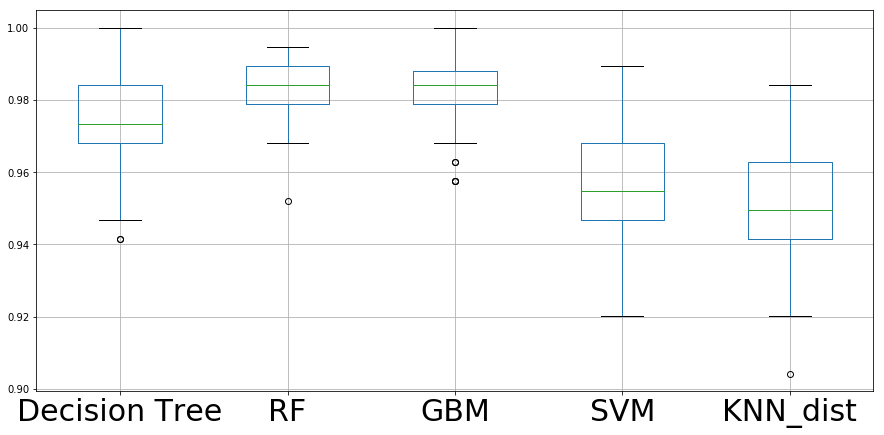

In [576]:
fig, ax = plt.subplots(figsize=(15,7))
dataframeError[["Decision Tree","RF","GBM","SVM","KNN_dist"]].boxplot(return_type='dict')
dataframeError.to_csv('dataframeError_B50.csv',index=None)
ax.set_xticklabels(["Decision Tree","RF","GBM","SVM","KNN_dist"],fontsize=30)
plt.show()

### Parameters Tuning

In [577]:
# Function that computes the score using cross validation
def score_cv(model, X_traing,y_traing, scoring='accuracy'):
    s = cross_val_score(model, X_traing,y_traing, cv = 5, scoring=scoring)
    return np.mean(s)

In [578]:
# K : used into the function 'GridSearchCV' for parameters tuning, represents the number of folds 
# in the cross validation
K=10

#### Decision Tree

In [579]:
#Range of parameters
param=[{"min_samples_leaf":[3,5,7,10]}]
dTree2= GridSearchCV(DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best'),
                              param,cv=K,n_jobs=-1)
dTreeOpt=dTree2.fit(X_traing,y_traing)
# Optimal parameter
min_sl=dTreeOpt.best_params_['min_samples_leaf']
print(min_sl)

10


In [580]:
score_cv(dTreeOpt, X_traing, y_traing, scoring='accuracy')

0.97467478554602427

In [581]:
#Range of parameters
param=[{"min_samples_split":[5,7,10,15]}]
dTree2= GridSearchCV(DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best', min_samples_leaf=min_sl),
                              param,cv=K,n_jobs=-1)
dTreeOpt=dTree2.fit(X_traing,y_traing)
# Optimal parameter
min_ss=dTreeOpt.best_params_['min_samples_split']
print(min_ss)

5


In [582]:
score_cv(dTreeOpt, X_traing, y_traing, scoring='accuracy')

0.97868385261567181

In [583]:
#Range of parameters
param=[{"max_depth":[10,50,100,500]}]
dTree2= GridSearchCV(DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best', min_samples_leaf=min_sl, min_samples_split=min_ss),
                              param,cv=K,n_jobs=-1)
dTreeOpt=dTree2.fit(X_traing,y_traing)
# Optimal parameter
max_d=dTreeOpt.best_params_['max_depth']
print(max_d)

50


In [584]:
score_cv(dTreeOpt, X_traing, y_traing, scoring='accuracy')

0.97868385261567181

In [585]:
### Model with best parameters
print('min_samples_leaf : ', min_sl)
print('min_samples_split : ', min_ss)
print('max_depth : ', max_d)

min_samples_leaf :  10
min_samples_split :  5
max_depth :  50


In [594]:
model_dt=DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best', min_samples_leaf=min_sl, min_samples_split=min_ss,
                              max_depth=max_d)
model_dt.fit(X_traing,y_traing)
score_cv(model, X_traing, y_traing, scoring='accuracy')

0.98001706742521899

#### Random Forest

In [588]:
#max_features represents the maximum number of features that will be used in the model
#Range of parameters
param=[{"max_features":["auto","sqrt","log2"]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=100,random_state=1),
        param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(X_traing,y_traing)

# paramètre optimal
max_f=rForestOpt.best_params_['max_features']
print(max_f)

auto


In [589]:
score_cv(rForestOpt, X_traing, y_traing, scoring='accuracy')

0.98535051928233841

In [590]:
#Range of parameters
param=[{"min_samples_leaf":[3,5,7,10]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=100,max_features=max_f,random_state=1),
        param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(X_traing,y_traing)
# Optimal parameter
min_sl=rForestOpt.best_params_['min_samples_leaf']
print(min_sl)

3


In [591]:
score_cv(rForestOpt,  X_traing, y_traing, scoring='accuracy')

0.97735040075855228

In [592]:
#Range of parameters
param=[{"min_samples_split":[5,7,10,15]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=100,max_features=max_f,min_samples_leaf=min_sl,
                                              random_state=1),
                       param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(X_traing,y_traing)
# Optimal parameter
min_ss=rForestOpt.best_params_['min_samples_split']
print(min_ss)

5


In [595]:
score_cv(rForestOpt,  X_traing, y_traing, scoring='accuracy')

0.97735040075855228

In [596]:
#Range of parameters
param=[{"max_depth":[10,50,100,500]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=100,max_features=max_f,min_samples_leaf=min_sl,
                                             min_samples_split=min_ss,random_state=1),
                       param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(X_traing,y_traing)
# Optimal parameter
max_d=rForestOpt.best_params_['max_depth']
print(max_d)

10


In [597]:
score_cv(rForestOpt,  X_traing, y_traing, scoring='accuracy')

0.97735040075855228

In [598]:
#Range of parameters
param=[{"n_estimators":[10,50,100,500,1000]}]
rForest2= GridSearchCV(RandomForestClassifier(max_features=max_f,min_samples_leaf=min_sl,max_depth=max_d,
                                             min_samples_split=min_ss,random_state=1),
        param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(X_traing,y_traing)
# Optimal parameter
n_est=rForestOpt.best_params_['n_estimators']
print(n_est)

10


In [599]:
score_cv(rForestOpt, X_traing, y_traing, scoring='accuracy')

0.97868373409188558

In [600]:
### Model with best param
print('n_estimators : ',n_est)
print('max_feature : ', max_f)
print('min_samples_leaf : ', min_sl)
print('min_samples_split : ', min_ss)
print('max_depth : ', max_d)

n_estimators :  10
max_feature :  auto
min_samples_leaf :  3
min_samples_split :  5
max_depth :  10


In [601]:
model_rf=RandomForestClassifier(n_estimators=n_est,max_features=max_f,min_samples_leaf=min_sl,max_depth=max_d,
                            min_samples_split=min_ss,random_state=1)
model_rf.fit(X_traing,y_traing)
score_cv(model, X_traing, y_traing, scoring='accuracy')

0.98001706742521899

### Voting with 2 best models

In [622]:
clf1 = DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best', min_samples_leaf=7, min_samples_split=5,
                              max_depth=10)

clf2 = RandomForestClassifier(max_features='auto', min_samples_leaf=3, min_samples_split=5, n_estimators=10, 
                              max_depth=10)


eclf1 = VotingClassifier(estimators=[('Decision Tree', clf1), ('rf', clf2)] , voting='hard')
eclf1 = eclf1.fit( X_traing, y_traing,)

score_cv(eclf1,  X_traing, y_traing, scoring='accuracy')

0.97735040075855228

In [623]:
clf1 = DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best', min_samples_leaf=7, min_samples_split=5,
                              max_depth=10)

clf2 = RandomForestClassifier(max_features='auto', min_samples_leaf=3, min_samples_split=5, n_estimators=10, 
                              max_depth=10)


eclf2 = VotingClassifier(estimators=[('Decision Tree', clf1), ('rf', clf2)] , voting='soft')
eclf2 = eclf2.fit(X_traing, y_traing)

score_cv(eclf2,  X_traing, y_traing, scoring='accuracy')

0.98135934930441349

### Final Model Comparison

In [624]:
import time

check_random_state(42)
tps0=time.clock()
K=9

# Classifiers

tree = DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                              splitter='best', min_samples_leaf=10, min_samples_split=5,
                              max_depth=10)

rf   = RandomForestClassifier(max_features='auto', min_samples_leaf=3, min_samples_split=5, n_estimators=10, 
                              max_depth=10)

voting_h =  VotingClassifier(estimators=[('Decision Tree', clf1), ('rf', clf2)] , voting='hard')

voting_s =  VotingClassifier(estimators=[('Decision Tree', clf1), ('rf', clf2)] , voting='soft')

# Number of iterations
B=50 # to test the loop : use B=3 instead

# Parameters grids
listMethGrid=[tree,rf,voting_h, voting_s]

arrayError=np.empty((B,5))

for i in range(B):
    X_traing4,X_testg4,Y_traing4,Y_testg4=train_test_split(X_traing, y_traing, test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_traing4)  
    
    X_traing4 = scaler.transform(X_traing4)  
    X_testg4 = scaler.transform(X_testg4)
    
    # Computation of test error
    for j,method in enumerate(listMethGrid):
        methFit=method.fit(X_traing4, Y_traing4)
        arrayError[i,j]=methFit.score(X_testg4,Y_testg4)
        
tps1=time.clock()
print("Execution time in mn :",(tps1 - tps0)/60)

dataframeError=pd.DataFrame(arrayError,columns=["Decision Tree","RF","Hard Voting","Soft Voting","..."])  

Execution time in mn : 0.04716137365558097


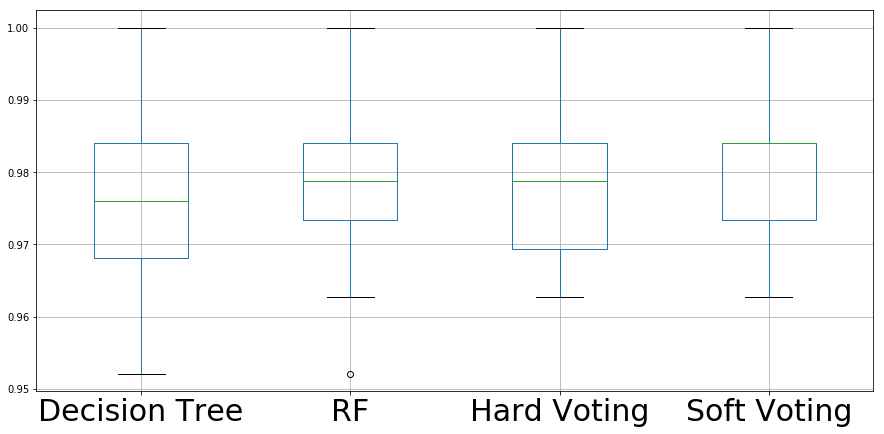

In [625]:
fig, ax = plt.subplots(figsize=(15,7))
dataframeError[["Decision Tree","RF","Hard Voting", "Soft Voting"]].boxplot(return_type='dict')
dataframeError.to_csv('dataframeError_B50.csv',index=None)
ax.set_xticklabels(["Decision Tree","RF","Hard Voting", "Soft Voting"],fontsize=30)
plt.show()

### ROC Curves

In [626]:
# Classifiers
tree = DecisionTreeClassifier(class_weight=None, criterion='gini',
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=0,
                              min_weight_fraction_leaf=0.0, presort=False, random_state=42,
                              splitter='best', min_samples_leaf=10, min_samples_split=5,
                              max_depth=10)

rf   = RandomForestClassifier(max_features='auto', min_samples_leaf=3, min_samples_split=5, n_estimators=10, 
                              max_depth=10)

voting =  VotingClassifier(estimators=[('Decision Tree', clf1), ('rf', clf2)] , voting='soft')

# Parameters grids
listMethGrid=[tree, rf, voting]

AUC Score for Decision Tree : 0.990740740741
AUC Score for RF : 0.995726495726
AUC Score for VOTING : 0.992402659069


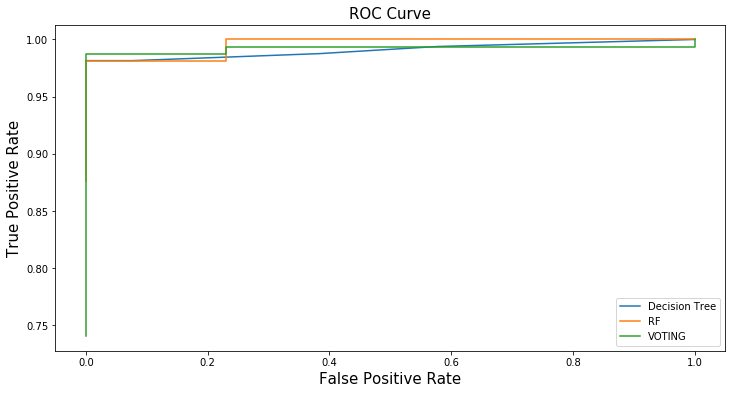

In [627]:
plt.figure(figsize=(12,6))
auc_sco=np.zeros(3)
run_time=np.zeros(3)
labels=["Decision Tree", "RF","VOTING"]
i=0

X_traing2,X_testg2,y_traing2,y_testg2=train_test_split(X_traing, y_traing,test_size=0.25)
scaler = StandardScaler()  
scaler.fit(X_traing2)  
    
X_traing2 = scaler.transform(X_traing2)  
X_testg2 = scaler.transform(X_testg2)
    
# Computation of test error
for j,method in enumerate(listMethGrid):
    methFit=method.fit(X_traing2, y_traing2)
    preds=methFit.predict_proba(X_testg2)[:,1]

    fpr, tpr, _ = metrics.roc_curve(y_testg2, preds)
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

    plt.plot(df['fpr'],df['tpr'],label=labels[i])

    auc_score=metrics.roc_auc_score(y_testg2, preds)
    auc_sco[i]=auc_score
    print( 'AUC Score for',labels[i],':', auc_score)
    i=i+1

plt.legend()   
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC Curve',fontsize=15)
plt.show()

# --5. Conclusions 

In [628]:
from time import time
def test_classifier(X_traing, y_traing, X_testg, y_testg, classifier):
    print("")
    print("==================================================================================")
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    now1 = time()
    list_of_labels = sorted(list(set(y_traing)))
    model = classifier.fit(X_traing, y_traing)
    print("Learing time {0}s".format(time() - now1))
    now1 = time()
    predictionsg = model.predict(X_testg)
    print("Predicting time {0}s".format(time() - now1))

    precisiong = precision_score(y_testg, predictionsg)
    recallg = recall_score(y_testg, predictionsg)
    accuracyg = accuracy_score(y_testg, predictionsg)
    f1g = f1_score(y_testg, predictionsg)
    print("=================================== Results ======================================")
    print("         Employees Left")
    print("F1       " + str(f1g))
    print("Precision" + str(precisiong))
    print("Recall   " + str(recallg))
    print("Accuracy " + str(accuracyg))
    print("===================================================================================")

    return model

### Decision Tree

In [629]:
test_classifier(X_traing,y_traing,X_testg,y_testg,model_dt)


Testing DecisionTreeClassifier
Learing time 0.0030074119567871094s
Predicting time 0.0s
=================================== Results ======================================
         Employees Left
F1       0.992736077482
Precision0.990338164251
Recall   0.995145631068
Accuracy 0.988047808765


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=0,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Random Forest

In [630]:
test_classifier(X_traing,y_traing,X_testg,y_testg,model_rf)


Testing RandomForestClassifier
Learing time 0.01805400848388672s
Predicting time 0.0010023117065429688s
=================================== Results ======================================
         Employees Left
F1       0.987775061125
Precision0.995073891626
Recall   0.980582524272
Accuracy 0.980079681275


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Voting

In [631]:
test_classifier(X_traing,y_traing,X_testg,y_testg,eclf1)


Testing VotingClassifier
Learing time 0.029077529907226562s
Predicting time 0.004009723663330078s
=================================== Results ======================================
         Employees Left
F1       0.997566909976
Precision1.0
Recall   0.995145631068
Accuracy 0.996015936255


VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=0,
            min_samples_leaf=7, min_samples_split=5,
            min_weight_fractio...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [632]:
test_classifier(X_traing,y_traing,X_testg,y_testg,eclf2)


Testing VotingClassifier
Learing time 0.026071548461914062s
Predicting time 0.002511739730834961s
=================================== Results ======================================
         Employees Left
F1       0.997566909976
Precision1.0
Recall   0.995145631068
Accuracy 0.996015936255


VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=0,
            min_samples_leaf=7, min_samples_split=5,
            min_weight_fractio...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

### Employees to Retain

In [633]:
preds = pd.DataFrame({'actual':  y_testg,
                      'predicted': eclf1.predict(X_testg)})

preds = preds.reset_index()
preds_proba = pd.DataFrame(rf.predict_proba(X_testg))
preds = pd.concat([preds, preds_proba], axis = 1)
preds.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

aux = pd.DataFrame(X_testg.reset_index())

output = pd.concat([preds, aux], axis = 1)
output.head()

,index,actual,predicted,Left_0,Left_1,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,5565,0,0,0.745995,0.254005,5565,0.84,0.84,6,261,...,0,0,0,0,0,0,1,0,0,0
1,12555,1,1,0.745995,0.254005,12555,0.10,0.90,7,281,...,0,0,0,0,0,0,0,1,0,0
2,14254,1,1,0.579328,0.420672,14254,0.10,0.80,7,281,...,0,0,0,0,0,0,0,0,0,1
3,12239,1,1,0.745995,0.254005,12239,0.10,0.97,7,254,...,0,0,0,0,0,0,0,1,0,0
4,1709,1,1,0.875856,0.124144,1709,0.10,0.81,6,269,...,0,0,1,0,0,0,0,0,0,0


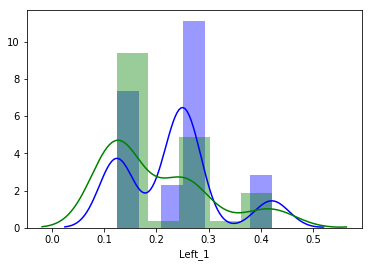

In [634]:
sns.distplot(output[output.actual == 1]["Left_1"], color = 'b')
sns.distplot(output[output.actual == 0]["Left_1"], color = 'g')
plt.show()

In [635]:
conf_matrix = metrics.confusion_matrix(output.actual,output.predicted,[1,0])
conf_matrix

array([[205,   1],
       [  0,  45]], dtype=int64)

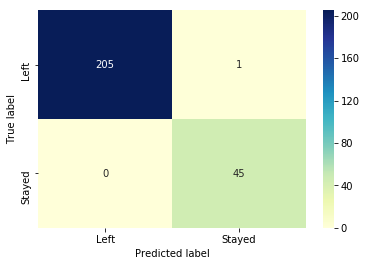

In [636]:
sns.heatmap(conf_matrix, annot=True, fmt = '.0f', xticklabels = ['Left', 'Stayed'], 
            yticklabels = ['Left', 'Stayed'], cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

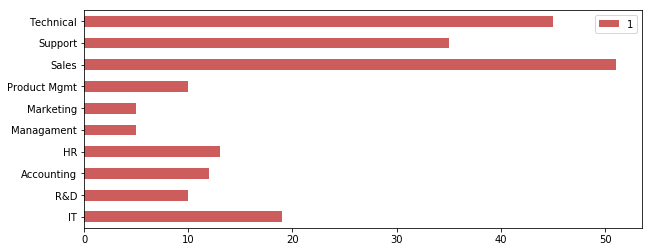

In [637]:
df1 = pd.DataFrame(output.groupby(['predicted'])['sales_IT'].sum())
df2 = pd.DataFrame(output.groupby(['predicted'])['sales_RandD'].sum())
df3 = pd.DataFrame(output.groupby(['predicted'])['sales_accounting'].sum())
df4 = pd.DataFrame(output.groupby(['predicted'])['sales_hr'].sum())
df5 = pd.DataFrame(output.groupby(['predicted'])['sales_management'].sum())
df6 = pd.DataFrame(output.groupby(['predicted'])['sales_marketing'].sum())
df7 = pd.DataFrame(output.groupby(['predicted'])['sales_product_mng'].sum())
df8 = pd.DataFrame(output.groupby(['predicted'])['sales_sales'].sum())
df9 = pd.DataFrame(output.groupby(['predicted'])['sales_support'].sum())
df10 = pd.DataFrame(output.groupby(['predicted'])['sales_technical'].sum())

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis = 1)
bar1 = pd.DataFrame(df.loc[1])
bar1.index = ['IT', 'R&D', 'Accounting', 'HR', 'Managament', 'Marketing', 'Product Mgmt', 'Sales', 'Support', 'Technical']

bar1.plot(kind='barh', color = ['#CD5C5C'], figsize=(10,4))
plt.show()

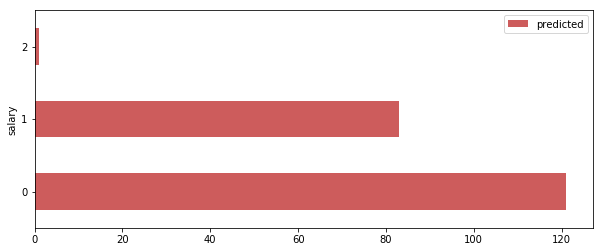

In [638]:
df1 = pd.DataFrame(output.groupby(['salary'])['predicted'].sum())
df1.plot(kind='barh', stacked = True, color = ['#CD5C5C'], figsize=(10,4))
plt.show()

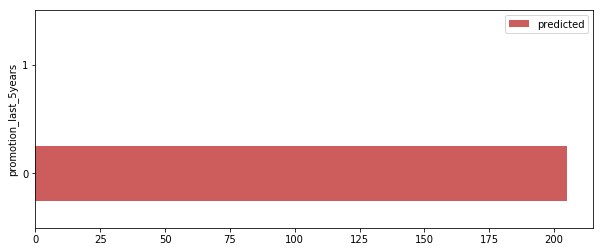

In [639]:
df1 = pd.DataFrame(output.groupby(['promotion_last_5years'])['predicted'].sum())
df1.plot(kind='barh', stacked = True, color = ['#CD5C5C'], figsize=(10,4))
plt.show()

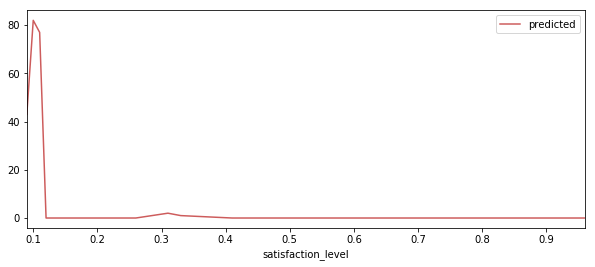

In [640]:
df1 = pd.DataFrame(output.groupby(['satisfaction_level'])['predicted'].sum())
df1.plot(kind='line', stacked = True, color = ['#CD5C5C'], figsize=(10,4))
plt.show()